# This notebook shows how to do train a multi-layer perceptron to classify handwritten digits

In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.exceptions import ConvergenceWarning
from sklearn.datasets  import load_digits

### Load and format MNIST dataset

In [3]:
np.random.seed(42)
mnist = load_digits()

In [4]:
n_samples = len(mnist.images)
images = mnist.images.reshape((n_samples, -1))
labels = mnist.target

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size=0.2, random_state=0)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((1437, 64), (1437,), (360, 64), (360,))

### Build an multi-layer perceptron model using sklearn

### Just using the default MLP parameters

In [6]:
model = MLPClassifier(random_state=1, max_iter=300).fit(X_train, Y_train)

In [9]:
#estimate prediction probabilities on the first test image (labeled 2 and 2 has the highest probability estimate):
model.predict_proba([X_test[0]]), [Y_test[0]]

(array([[2.29741465e-08, 1.50524694e-07, 9.99999774e-01, 9.74397916e-09,
         2.37134568e-10, 1.75499937e-08, 6.08539830e-12, 2.57281599e-09,
         2.24491962e-08, 3.16197453e-11]]),
 [2])

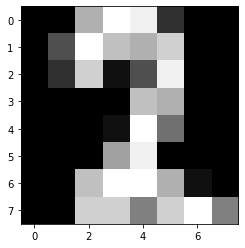

In [10]:
fig = plt.figure
plt.imshow(X_test[0].reshape((8,8)), cmap='gray')
plt.show()

In [11]:
#make predictions on the first 5 images:
model.predict(X_test[:5, :])

array([2, 8, 2, 6, 6])

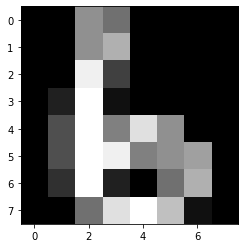

In [12]:
fig = plt.figure
plt.imshow(X_test[3].reshape((8,8)), cmap='gray')
plt.show()

In [13]:
model.score(X_test, Y_test)

0.975

Confusion matrix, without normalization
[[27  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  1  0]
 [ 0  1 35  0  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 29  0  0  1  0  0]
 [ 0  0  0  0  0 39  0  0  0  1]
 [ 0  1  0  0  0  0 43  0  0  0]
 [ 0  0  0  0  0  0  0 39  0  0]
 [ 0  1  0  2  0  0  0  0 36  0]
 [ 0  0  0  0  0  0  0  1  0 40]]
Normalized confusion matrix
[[1.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.97 0.   0.   0.   0.   0.   0.   0.03 0.  ]
 [0.   0.03 0.97 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   1.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.97 0.   0.   0.03 0.   0.  ]
 [0.   0.   0.   0.   0.   0.97 0.   0.   0.   0.03]
 [0.   0.02 0.   0.   0.   0.   0.98 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.   0.03 0.   0.05 0.   0.   0.   0.   0.92 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.02 0.   0.98]]


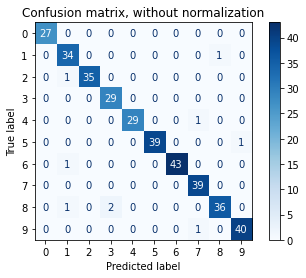

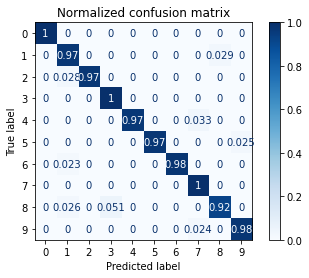

In [14]:
# this code is adopted from this example:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

np.set_printoptions(precision=2)
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, Y_test,
                                 display_labels=mnist.target_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

### Maybe we can play around with layers and activation functions?

In [15]:
model = MLPClassifier(hidden_layer_sizes=(400,150,50), max_iter=500,activation = 'relu',solver='adam',random_state=1).fit(X_train, Y_train)
model.score(X_test, Y_test)

0.9861111111111112